# Importing necessary files

In [1]:

from utils import *
from annealing_schedules import *
from mcmc import *
from experiments import *

import pickle as cPickle

3.4.2


# Glauber (constant beta: 2.0) vs Metropolis (constant beta: 4.0)

In [2]:
# Min. energy error for a few different alphas.
n = [100]
alphas = np.linspace(0.05, 2, 32)
N = 100000
n_exp = 10

beta_0 = 4.0
schedule = ConstantSchedule(beta_0)
b_v = schedule.get_schedule(N)

exps_M = MultiExperiments(n, alphas, N, b_v, n_exp, MCMC.metropolis )

beta_0 = 2.0
schedule_G = ConstantSchedule(beta_0)
b_v_G = schedule_G.get_schedule(N)

exps_G = MultiExperiments(n, alphas, N, b_v_G, n_exp, MCMC.glauber )



Running 32 experiments.
Running 32 experiments.


## Plot mean and std errors for different values of alpha

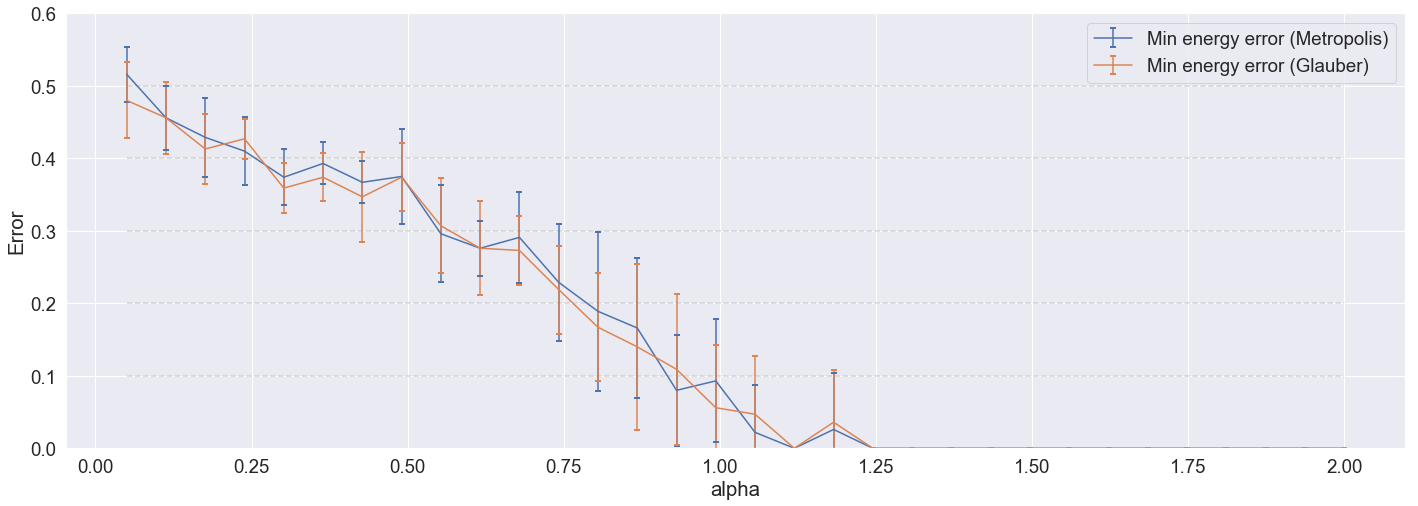

In [3]:
sns.set(font_scale=1.7)
sns.set_palette("deep")

fsave = 'Plots/Alpha_MCMC_Glauber_Const_Beta_4_2_longer'
plot_error([exps_M.get_stats("min_energy_errors"), 
            exps_G.get_stats("min_energy_errors")], x_axis_vector=alphas,
           xlabel="alpha", legend=["Min energy error (Metropolis)", 
                                   "Min energy error (Glauber)"], fsave=fsave)

fpickle = 'alpha_beta_4M_2G_longer'
dump_alpha_comparison( exps_G, exps_M, fpickle)

## Compare final sample error against min energy sample error

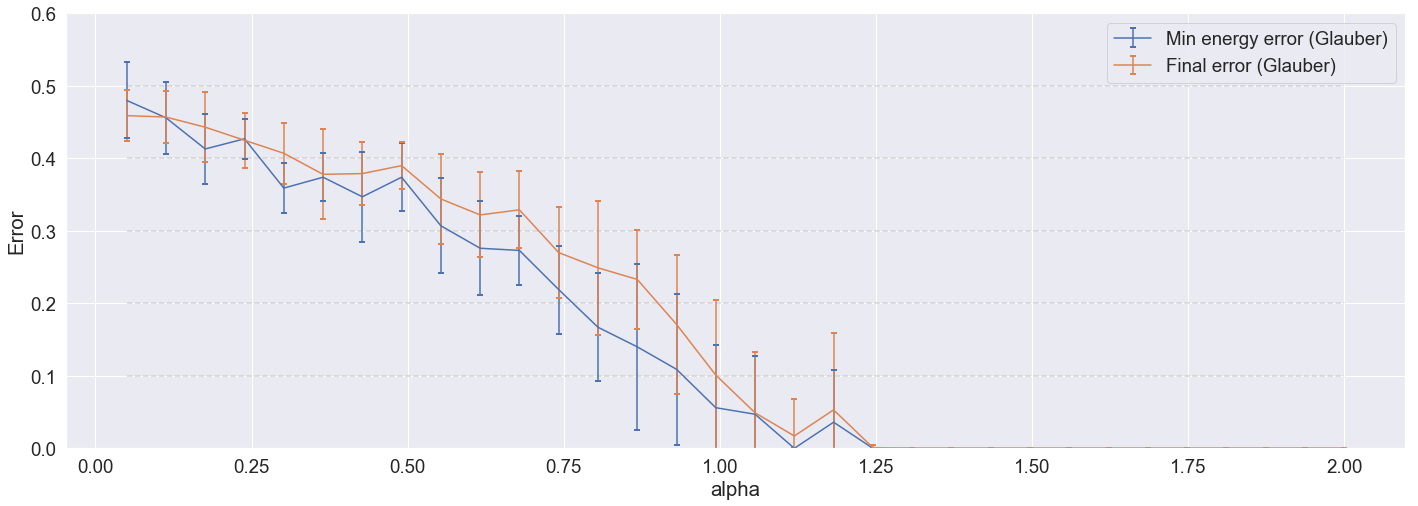

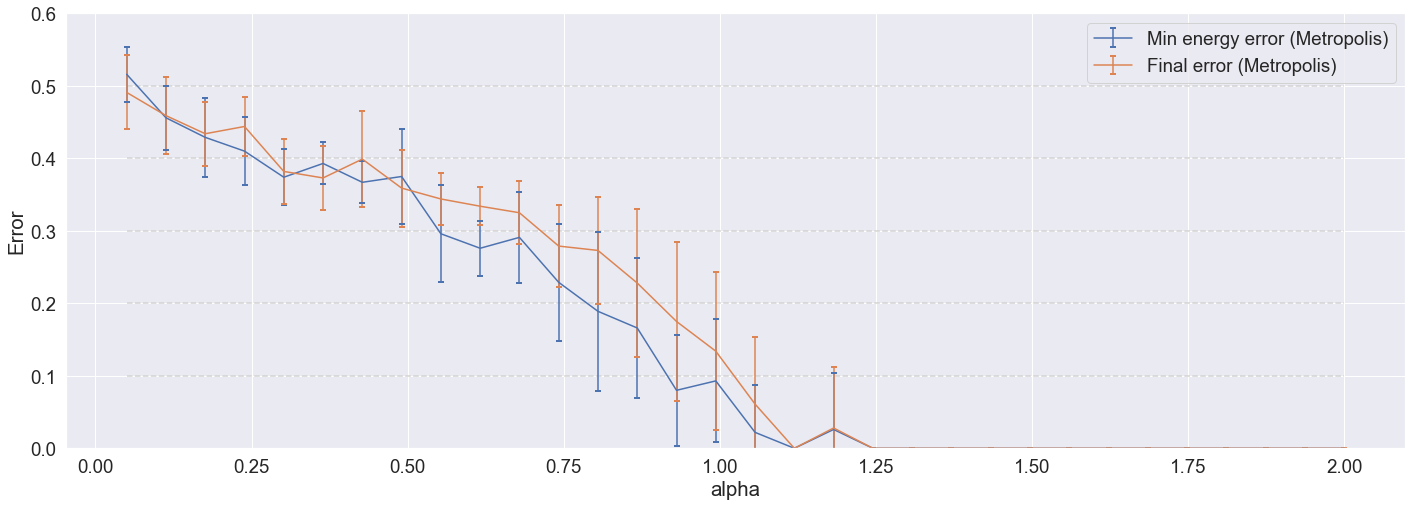

In [4]:
fsave = 'Plots/Glauber_Beta_2_Min_Energy_Final_Error_longer'
plot_error([exps_G.get_stats("min_energy_errors"),
            exps_G.get_stats("final_errors"),], x_axis_vector=alphas,
           xlabel="alpha", legend=["Min energy error (Glauber)",
                                   "Final error (Glauber)"], fsave=fsave)

fsave = 'Plots/Metropolis_Beta_4_Min_Energy_Final_Error_longer'
plot_error([exps_M.get_stats("min_energy_errors"),
            exps_M.get_stats("final_errors"),], x_axis_vector=alphas,
           xlabel="alpha", legend=["Min energy error (Metropolis)",
                                   "Final error (Metropolis)"], fsave=fsave)



# Glauber (constant beta: 2.0) vs Metropolis (logarithmic beta), N=100000 steps

In [6]:
# Min. energy error for a few different alphas.
n = [100]
alphas = np.linspace(0.05, 2, 32)
N = 100000
n_exp = 10

t_start = 2.0
t_freeze = 0.15
log_mul_schedule = LogarithmicMultiplicativeSchedule( T_start=t_start , T_freeze=t_freeze , alpha=6.00)
schedule = log_mul_schedule
b_v = schedule.get_schedule(N)

exps_M1 = MultiExperiments(n, alphas, N, b_v,  n_exp, MCMC.metropolis )

beta_0 = 2.0
schedule_G = ConstantSchedule(beta_0)
b_v_G = schedule_G.get_schedule(N)

exps_G1 = MultiExperiments(n, alphas, N, b_v_G,  n_exp, MCMC.glauber )



Running 32 experiments.
Running 32 experiments.


## Plot mean and std errors for different values of alpha

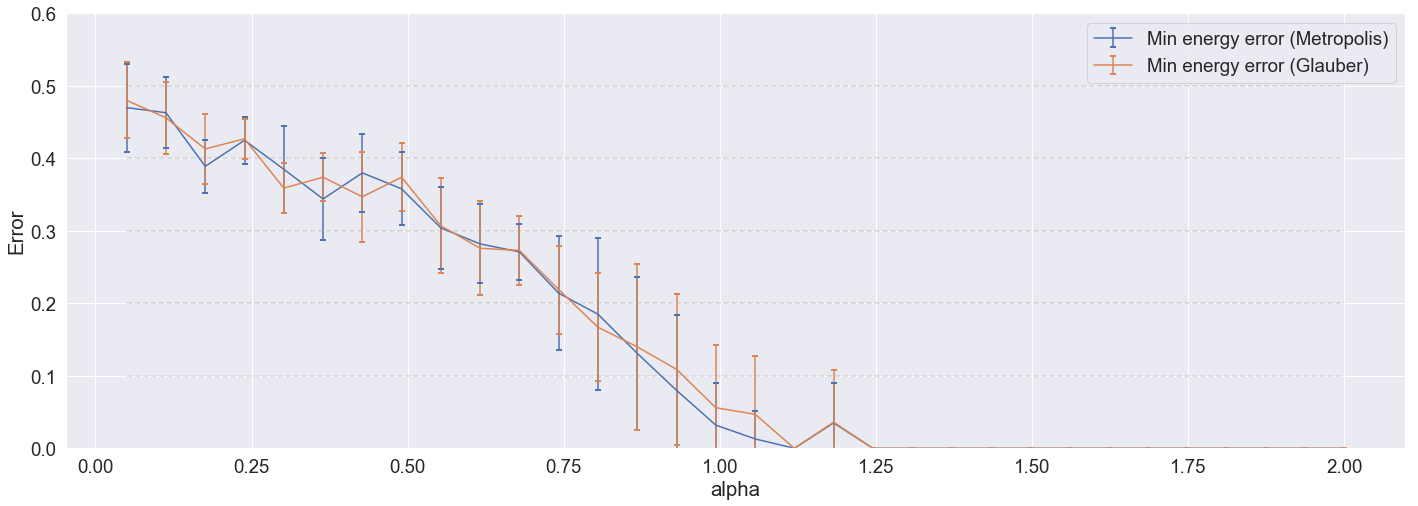

In [7]:
fsave = 'Plots/Alpha_MCMC_Glauber_Log_Const_Beta_2'
plot_error([exps_M1.get_stats("min_energy_errors"), 
            exps_G1.get_stats("min_energy_errors")], x_axis_vector=alphas,
           xlabel="alpha", legend=["Min energy error (Metropolis)", 
                                   "Min energy error (Glauber)"], fsave=fsave)

fpickle = 'alpha_beta_logM_2G'
dump_alpha_comparison( exps_G1, exps_M1, fpickle)

## Compare Glauber (constant beta: 2.0),  Metropolis (constant beta: 4.0),  Metropolis (logarithmic beta), N=100000 steps 

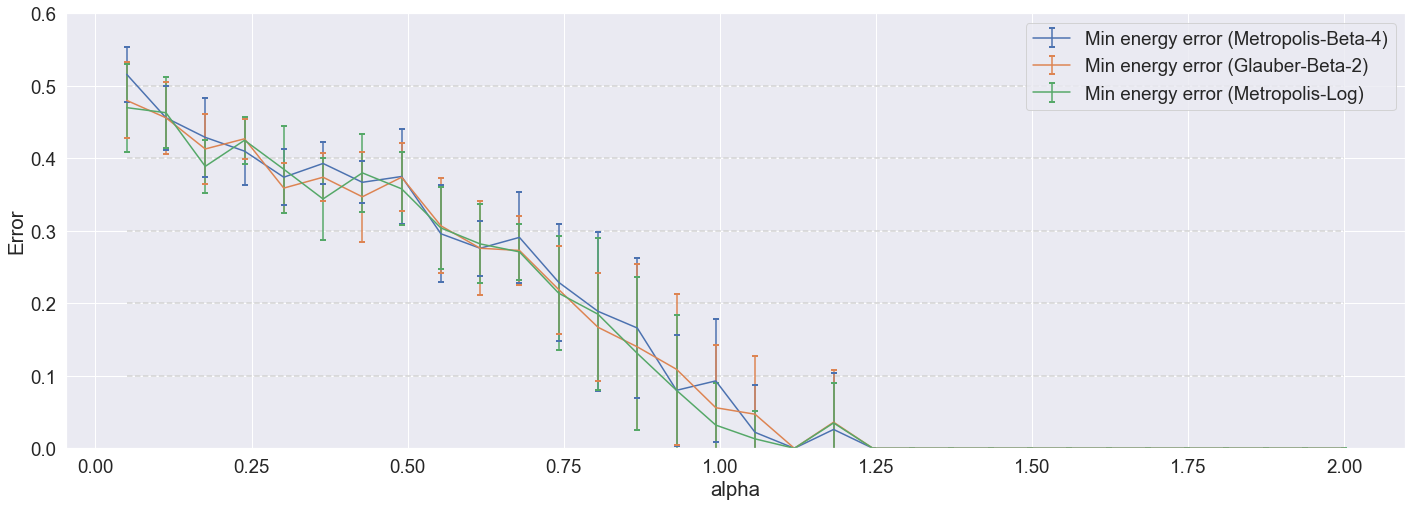

In [9]:
fsave = 'Plots/Alpha_MCMC_4_Glauber_2_MCMC_Log'
plot_error([exps_M.get_stats("min_energy_errors"), 
            exps_G1.get_stats("min_energy_errors"),
           exps_M1.get_stats("min_energy_errors")], x_axis_vector=alphas,
           xlabel="alpha", legend=["Min energy error (Metropolis-Beta-4)", 
                                   "Min energy error (Glauber-Beta-2)",
                                   "Min energy error (Metropolis-Log)"], fsave=fsave)

fpickle = 'alpha_MCMC_4_Glauber_2_MCMC_Log'

save_object = defaultdict(defaultdict)
save_object['exp_G'] = exps_G1
save_object['exp_M1'] = exps_M
save_object['exp_M2'] = exps_M1

    
file_handler = open("%s.pkl" %(fpickle),"wb")
cPickle.dump(save_object,file_handler)
file_handler.close()
